### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datasets

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


### Visualization

In [8]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [9]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


<AxesSubplot:title={'center':'Males and Females who survived'}, xlabel='Sex', ylabel='Survived'>

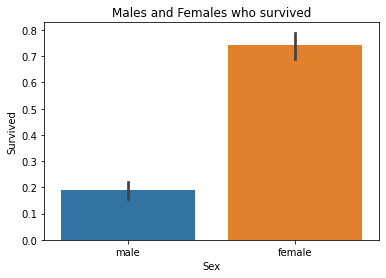

In [10]:
plt.title("Males and Females who survived")
sns.barplot(x = train['Sex'], y = train['Survived'])

/home/nijat/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Age of people who survived or did not survive'}, xlabel='Survived', ylabel='Age'>

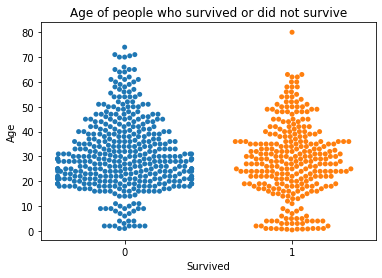

In [11]:
plt.title("Age of people who survived or did not survive")
sns.swarmplot(x = train['Survived'], y = train['Age'])

/home/nijat/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/nijat/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':"People's Fair who survived or did not survive"}, xlabel='Survived', ylabel='Fare'>

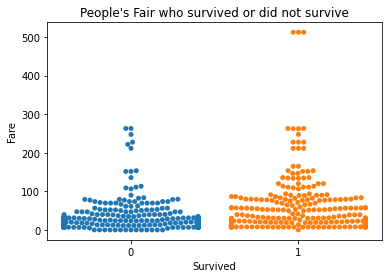

In [12]:
plt.title("People's Fair who survived or did not survive")
sns.swarmplot(x = train['Survived'], y = train['Fare'])

<AxesSubplot:title={'center':'Survived and not survived people with their Fare and Age'}, xlabel='Age', ylabel='Fare'>

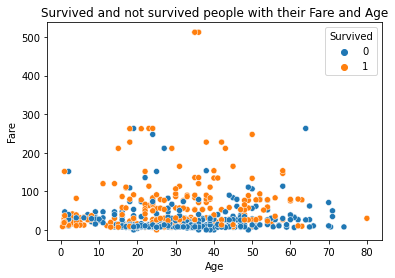

In [13]:
plt.title("Survived and not survived people with their Fare and Age")
sns.scatterplot(x = train['Age'], y = train['Fare'], hue = train['Survived'])

### Identifying missing datas

In [14]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

/home/nijat/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


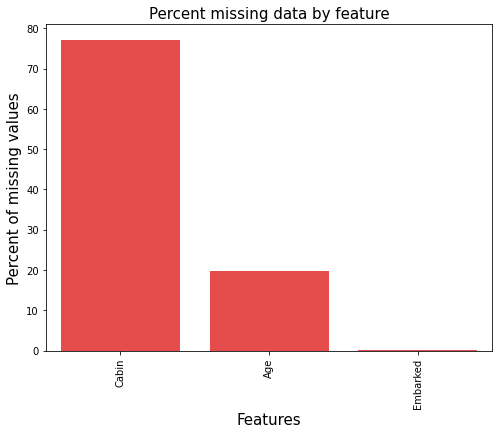

In [15]:
missingdata(train)

/home/nijat/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


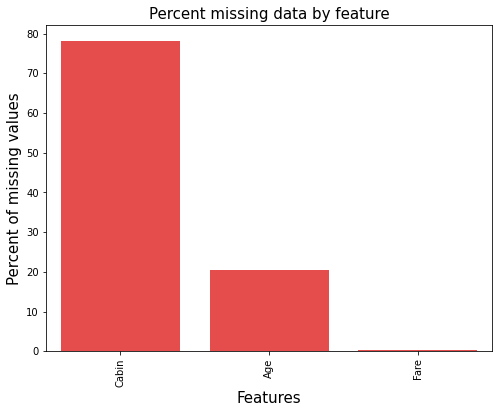

In [16]:
missingdata(test)

### Dealing with missing datas

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# We remove the Cabin column since it has more than 77% of missing data

def dropColumn(data, column):
    data.drop(column, axis=1, inplace = True)
    
dropColumn(train, 'Cabin')
dropColumn(test, 'Cabin')

In [19]:
# Both the test and train Age features contains more the 15% of missing Data so we are fill with the median

def fillMedian(data, column):
    data[column].fillna(data[column].median() , inplace = True)

fillMedian(train, "Age")
fillMedian(test, "Age")

In [20]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [21]:
print(train.isnull().sum().sum(), test.isnull().sum().sum())

0 0


### Feature Engineering

In [22]:
train_df = train
test_df = test
data=[train_df, test_df]

In [23]:
for df in data:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [24]:
# create bin for age features
for df in data:
    df['Age_bin'] = pd.cut(df['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [25]:
## create bin for fare features
for df in data:
    df['Fare_bin'] = pd.cut(df['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])

In [26]:
## create bin for fare features

for df in data:
    df['Fare_bin'] = pd.cut(df['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])

In [27]:
for df in data:
    drop_column = ['Age','Fare','Name','Ticket']
    df.drop(drop_column, axis=1, inplace = True)

In [28]:
train.drop("PassengerId", axis=1, inplace = True)

In [29]:
train = pd.get_dummies(train_df, columns = ["Sex", "Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex", "Age_type","Em_type","Fare_type"])

In [30]:
test = pd.get_dummies(test_df, columns = ["Sex","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Age_type","Em_type","Fare_type"])

In [31]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Age_bin,Fare_bin
0,0,3,male,1,0,S,2,Adult,Low_fare
1,1,1,female,1,0,C,2,Adult,high_fare
2,1,3,female,0,0,S,1,Adult,median_fare
3,1,1,female,1,0,S,2,Adult,high_fare
4,0,3,male,0,0,S,1,Adult,median_fare


In [32]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Adult,Low_fare
1,893,3,female,1,0,S,2,Elder,Low_fare
2,894,2,male,0,0,Q,1,Elder,median_fare
3,895,3,male,0,0,S,1,Adult,median_fare
4,896,3,female,1,1,S,3,Adult,median_fare


## Model Building

In [33]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix

In [34]:
y = train["Survived"]
X = train.drop("Survived",axis=1)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 17), (268, 17), (623,), (268,))

In [36]:
def predict(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('The accuracy of model is',round(accuracy_score(pred,y_test)*100,2))

In [37]:
def crossPred(model):
    kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
    result = cross_val_score(model, X ,y,cv=10, scoring='accuracy')
    print('The cross validated score for model is:',round(result.mean()*100,2))
    y_pred = cross_val_predict(model, X, y, cv=10)
    
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")
    plt.title('Confusion_matrix', y=1.05, size=15)

### I. Logistic Regression

The accuracy of model is 80.6
The cross validated score for model is: 79.57


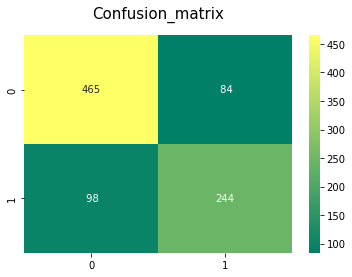

In [38]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

logReg = LogisticRegression()
predict(logReg)
crossPred(logReg)

### II. Random Forest Classifier

The accuracy of model is 79.85
The cross validated score for model is: 81.82


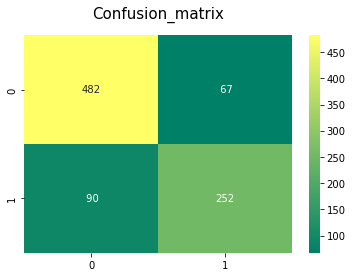

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
predict(rfc)
crossPred(rfc)

### III. Support Vector Machines

The accuracy of model is 82.84
The cross validated score for model is: 82.61


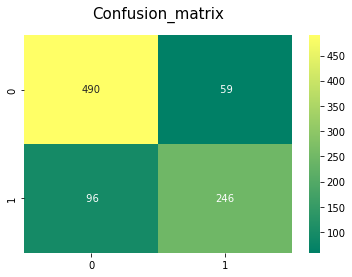

In [40]:
from sklearn.svm import SVC, LinearSVC

svm = SVC()
predict(svm)
crossPred(svm)

### IV. Gradient Boosting Classifier

The accuracy of model is 80.6
The cross validated score for model is: 82.16


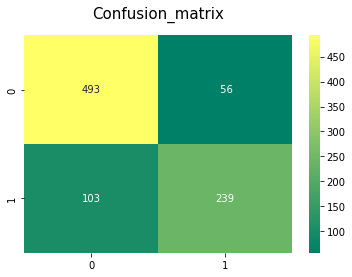

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

GBC= GradientBoostingClassifier()

predict(GBC)
crossPred(GBC)

## Hyperparameter Tuning

In [42]:
train_X = train.drop("Survived", axis=1)
train_Y=train["Survived"]
test_X  = test.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 17), (891,), (418, 17))

In [43]:
# Random Forest Classifier Parameters tunning 
from sklearn.model_selection import GridSearchCV

n_estimator=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estimator}

model_rf = GridSearchCV(rfc,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_rf.fit(train_X, train_Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'n_estimators': range(100, 1000, 100)},
             scoring='accuracy', verbose=1)

In [44]:
# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

0.8294582888707552


RandomForestClassifier(n_estimators=600)

### Apply the Estimator which got from parameter tuning of Random Forest¶

In [48]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=600)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

In [49]:
print("final accuracy:", acc_random_forest)

final accuracy: 88.78


In [50]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})

In [51]:
submission.to_csv('submission.csv',index=False)